In [1]:
import preprocessing

cleaned_data = preprocessing.data


cleaned_data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,posts,type
0,know intj tool use interact peopl excus antiso...,I
1,rap music ehh opp yeah know valid well know fa...,I
2,prefer p hd low except wew lad video p mind go...,I
3,drink like wish could drink red wine give head...,I
4,space program ah bad deal me freelanc max seem...,I


In [ ]:
import pandas as pd
import preprocessing
df = preprocessing.data


In [ ]:
# TF-IDF
df_origin = cleaned_data.copy()
df_origin.rename(columns={'type': 'type'}, inplace=True)

mbti_Vectoriser = TfidfVectorizer(norm=None, max_features=1000, max_df=0.9)
mbti_tf_idf = mbti_Vectoriser.fit_transform(df_origin['posts'])

feature_names = mbti_Vectoriser.get_feature_names_out()

index = [i for i, _ in enumerate(df_origin['posts'])]
df_mbti_tf_idf = pd.DataFrame(mbti_tf_idf.T.todense(), index=feature_names, columns=index)
df_mbti_tf_idf = df_mbti_tf_idf.T

type_df = pd.DataFrame(df_origin['type'])

df = pd.concat([df_mbti_tf_idf, type_df], axis=1)

print(df)


        abil       abl  absolut  abstract      abus    accept    accord  \
0        0.0  0.000000      0.0       0.0  0.000000  0.000000  3.598611   
1        0.0  3.969998      0.0       0.0  0.000000  4.834323  0.000000   
2        0.0  0.000000      0.0       0.0  0.000000  2.417161  0.000000   
3        0.0  0.000000      0.0       0.0  0.000000  2.417161  0.000000   
4        0.0  0.000000      0.0       0.0  0.000000  0.000000  3.598611   
...      ...       ...      ...       ...       ...       ...       ...   
106062   0.0  1.984999      0.0       0.0  0.000000  0.000000  0.000000   
106063   0.0  1.984999      0.0       0.0  0.000000  0.000000  0.000000   
106064   0.0  0.000000      0.0       0.0  0.000000  0.000000  0.000000   
106065   0.0  3.969998      0.0       0.0  3.662465  0.000000  0.000000   
106066   0.0  1.984999      0.0       0.0  0.000000  0.000000  0.000000   

         account  accur    achiev  ...       wow     write     wrong  \
0       0.000000    0.0  0.

In [ ]:
import pandas as pd
import preprocessing
df = preprocessing.data

sampled_df = pd.DataFrame()

mbti_types = df['type'].unique()

for mbti in mbti_types:
    sampled_subset = df[df['type'] == mbti].sample(n=150, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_subset])

sampled_df.reset_index(drop=True, inplace=True)
df = sampled_df

print("Total number of sampled data:", len(sampled_df))
print(df)


Total number of sampled data: 300
                                                 posts type
0    edg sword cut other cut judgement cut other el...    I
1    rememb stand routin start laugh almost drop ca...    I
2    make difficu guest hide true person henc watch...    I
3    treasur neither moth rust corruptyour capit le...    I
4    need know littl bite everyth get deep one area...    I
..                                                 ...  ...
295  peopl face becom oh trust quit bite oatmeal bo...    E
296  hair top head see would fast long hair find st...    E
297  sport much surprisingli comput money pretti mu...    E
298  whether love small perspect though take advic ...    E
299  one like blunt albeit good nf augh pad ye agre...    E

[300 rows x 2 columns]


In [38]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

I_posts = cleaned_data[cleaned_data['type'] == 'I']['posts']
E_posts = cleaned_data[cleaned_data['type'] == 'E']['posts']

I_text = ' '.join(I_posts)
E_text = ' '.join(E_posts)

I_word_count = Counter(I_text.split())
E_word_count = Counter(E_text.split())

print("Type I word frequency:")
print(I_word_count.most_common(10))

print("E-class word frequency:")
print(E_word_count.most_common(10))


Type I word frequency:
[('like', 561186), ('think', 452822), ('peopl', 423191), ('get', 402278), ('thing', 313862), ('make', 307425), ('feel', 289827), ('know', 288850), ('one', 281232), ('go', 278749)]
E-class word frequency:
[('like', 178622), ('think', 143141), ('get', 130830), ('peopl', 130765), ('make', 98530), ('thing', 92680), ('know', 90834), ('one', 88489), ('go', 85086), ('say', 84388)]


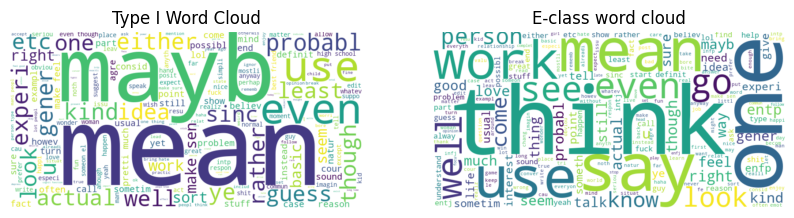

In [40]:
# Generate word cloud
I_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(I_text)
E_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(E_text)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(I_wordcloud, interpolation='bilinear')
plt.title('Type I Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(E_wordcloud, interpolation='bilinear')
plt.title('E-class word cloud')
plt.axis('off')

plt.show()


Type I average text length: 2992.8986576099755
Average text length for Class E: 2969.3967703820404


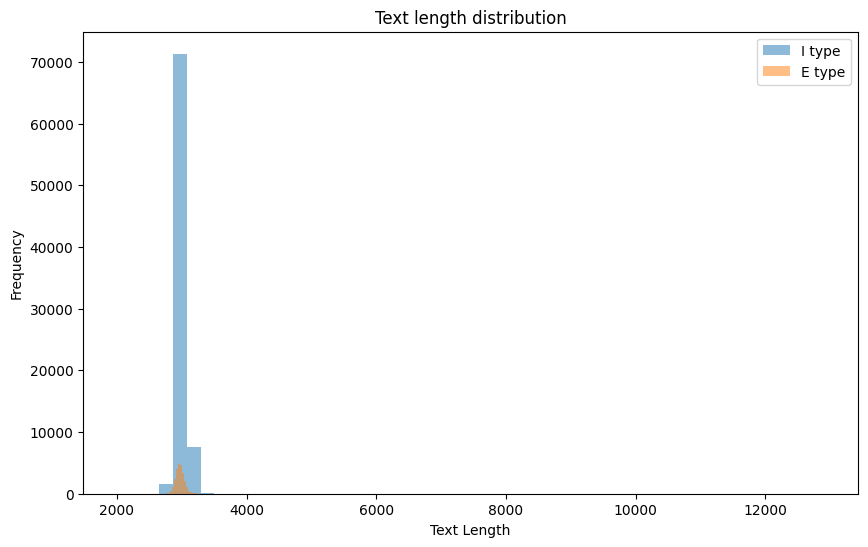

In [37]:
I_length = I_posts.apply(len)
E_length = E_posts.apply(len)

# Output the average text length of classes I and E
print("Type I average text length:", I_length.mean())
print("Average text length for Class E:", E_length.mean())

# Draw a distribution map of the length of type I and E text
plt.figure(figsize=(10, 6))
plt.hist(I_length, bins=50, alpha=0.5, label='I type')
plt.hist(E_length, bins=50, alpha=0.5, label='E type')
plt.title('Text length distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


                                               posts type sentiment
0  know intj tool use interact peopl excus antiso...    I  positive
1  rap music ehh opp yeah know valid well know fa...    I  positive
2  prefer p hd low except wew lad video p mind go...    I  positive
3  drink like wish could drink red wine give head...    I  positive
4  space program ah bad deal me freelanc max seem...    I  positive
Type I emotional distribution:
sentiment
positive    76430
negative     4246
neutral         1
Name: count, dtype: int64
E-type emotional distribution:
sentiment
positive    24307
negative     1083
Name: count, dtype: int64
Type I data:
                                               posts type sentiment
0  know intj tool use interact peopl excus antiso...    I  positive
1  rap music ehh opp yeah know valid well know fa...    I  positive
2  prefer p hd low except wew lad video p mind go...    I  positive
3  drink like wish could drink red wine give head...    I  positive
4  space progra

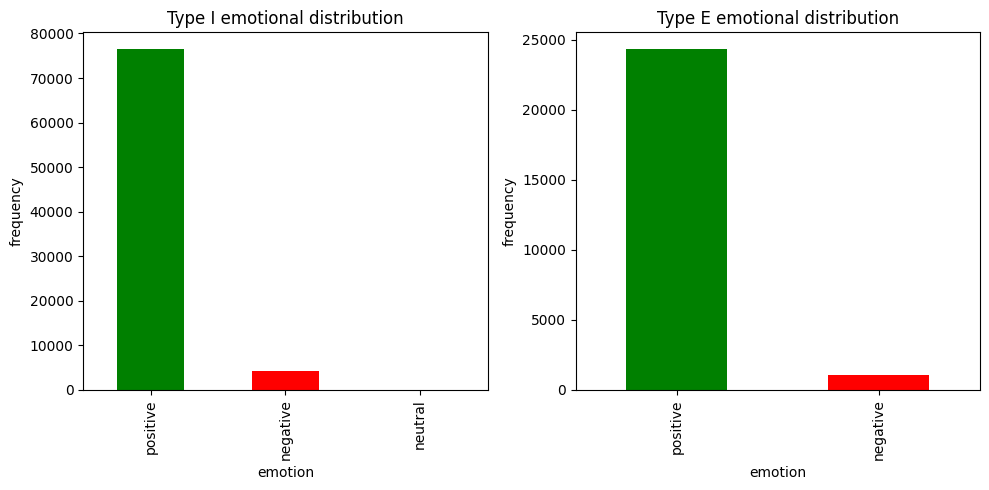

In [43]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

cleaned_data['sentiment'] = cleaned_data['posts'].apply(analyze_sentiment)

print(cleaned_data.head())


I_sentiment = cleaned_data[cleaned_data['type'] == 'I']['sentiment']
E_sentiment = cleaned_data[cleaned_data['type'] == 'E']['sentiment']

I_sentiment_counts = I_sentiment.value_counts()
E_sentiment_counts = E_sentiment.value_counts()

print("Type I emotional distribution:")
print(I_sentiment_counts)

print("E-type emotional distribution:")
print(E_sentiment_counts)

# Draw an emotional distribution map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
I_sentiment_counts.plot(kind='bar', title='Type I emotional distribution', color=['green', 'red'])
plt.xlabel('emotion')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
E_sentiment_counts.plot(kind='bar', title='Type E emotional distribution', color=['green', 'red'])
plt.xlabel('emotion')
plt.ylabel('frequency')

I_data = cleaned_data[cleaned_data['type'] == 'I'][['posts', 'type', 'sentiment']]
E_data = cleaned_data[cleaned_data['type'] == 'E'][['posts', 'type', 'sentiment']]

# Display partial data of types I and E
print("Type I data:")
print(I_data.head())

print("Type E data:")
print(E_data.head())

plt.tight_layout()
plt.show()


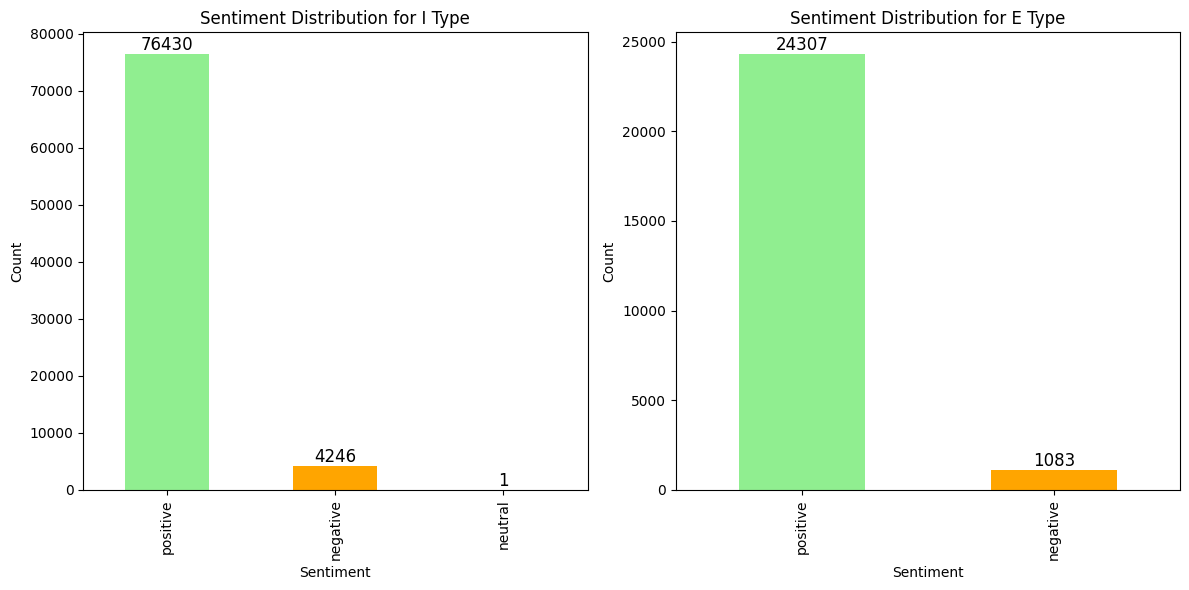

In [ ]:
import matplotlib.pyplot as plt

I_sentiment = cleaned_data[cleaned_data['type'] == 'I']['sentiment']
E_sentiment = cleaned_data[cleaned_data['type'] == 'E']['sentiment']

I_sentiment_counts = I_sentiment.value_counts()
E_sentiment_counts = E_sentiment.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

I_sentiment_counts.plot(kind='bar', ax=axes[0], color=['lightgreen', 'orange'])
axes[0].set_title("Sentiment Distribution for I Type")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

for i, v in enumerate(I_sentiment_counts):
    axes[0].text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12, color='black')

E_sentiment_counts.plot(kind='bar', ax=axes[1], color=['lightgreen', 'orange'])
axes[1].set_title("Sentiment Distribution for E Type")
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Count")

for i, v in enumerate(E_sentiment_counts):
    axes[1].text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df_mbti_tf_idf  
y = df_origin['type']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

# #Prediction label
model_predictions = model.predict(X_test)

# Calculate evaluation indicators
accuracy = accuracy_score(y_test, model_predictions)
precision = precision_score(y_test, model_predictions, pos_label='E')  # Here, Class E is considered as the positive category
recall = recall_score(y_test, model_predictions, pos_label='E')
f1 = f1_score(y_test, model_predictions, pos_label='E')

# Output evaluation indicators
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8828132365419062
Precision: 0.805032925682032
Recall: 0.6738188976377952
F1 Score: 0.7336048006858122


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 3423  1657]
 [  829 15305]]


In [54]:
# Ensure both I and E sentiment counts include all sentiment categories
all_sentiments = ['positive', 'negative', 'neutral']

# Fill missing values with 0
I_sentiment_counts = I_sentiment_counts.reindex(all_sentiments, fill_value=0)
E_sentiment_counts = E_sentiment_counts.reindex(all_sentiments, fill_value=0)

# Compute percentages again
I_total = I_sentiment_counts.sum()
E_total = E_sentiment_counts.sum()

I_sentiment_percent = (I_sentiment_counts / I_total * 100).round(2)
E_sentiment_percent = (E_sentiment_counts / E_total * 100).round(2)

# Create final DataFrame
sentiment_df1 = pd.DataFrame({
    "I-Type Users (Count)": I_sentiment_counts,
    "I-Type Users (%)": I_sentiment_percent
})

sentiment_df2 = pd.DataFrame({
    "E-Type Users (Count)": E_sentiment_counts,
    "E-Type Users (%)": E_sentiment_percent
})

# Display results
print(sentiment_df1)
print(sentiment_df2)


           I-Type Users (Count)  I-Type Users (%)
sentiment                                        
positive                  76430             94.74
negative                   4246              5.26
neutral                       1              0.00
           E-Type Users (Count)  E-Type Users (%)
sentiment                                        
positive                  24307             95.73
negative                   1083              4.27
neutral                       0              0.00
